# Manipulación básica de datos

Cambiamos el directorio de trabajo a la carpeta en la que se encuentran nuestros datos.

In [6]:
import os
os.chdir(r"C:\americo\ia_dema\01_Manipulacion_Basica_datos\00_Teoria")

Importamos las librerías que vamos a utilizar para tratar los datos.

In [10]:
import pandas as pd
import numpy as np

## Carga de datos.

El método `read_csv()` nos sirve para abrir archivos de datos en los que el dato se encuentra en archivos de texto plano.

In [11]:
pd.read_csv("consumoelectricov1.csv")
# Obtenemos el error:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 53: invalid continuation byte

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 53: invalid continuation byte

Al ser texto plano, puede estar codificado para contener caracteres especiales como la ñ y las letras con tilde como en este caso.

In [12]:
pd.read_csv("consumoelectricov1.csv", encoding="latin-1")
# Obtenemos el error:
# ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 9

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 9


Los csv (comma separated values) usan las comas para separar los datos de cada fila en columnas y los saltos de línea para separar las filas. Sin embargo no es raro encontrarnos con 'csv's que usen otros caracteres separadores.

In [13]:
pd.read_csv("consumoelectricov1.csv", sep=";", encoding="latin-1")

,Indicadores municipales de sostenibilidad: Consumo eléctrico anual del municipio (Kwh./habitante),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
3,Araba/Álava,NaN,"7.562,88","7.595,83","7.578,43","7.939,13","8.216,86","7.978,62","7.477,28","9.211,09",0,0,0,0,NaN,0
4,Bizkaia,NaN,"6.581,07","6.405,24","6.073,57","6.000,82","6.678,99","6.902,48","6.343,39","7.607,47",0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,48915,Ziortza-Bolibar,"2.088,98","1.967,21","2.155,81","2.258,48","1.611,92","1.765,80","1.795,82","1.758,68","1.259,54","1.315,58","2.668,96","4.714,38","4.608,56","4.248,04"
280,20028,Zizurkil,"14.627,46","13.818,31","13.382,69","17.124,82","17.584,41","18.497,73","17.724,03","16.189,97","5.803,96","5.800,26","5.373,82","5.185,71","5.159,19","5.087,84"
281,1063,Zuia,"3.475,49","3.452,86","3.585,49","3.526,35","3.733,28","3.897,58","3.880,25","4.097,61","4.205,70","4.150,84","4.064,04","4.112,30","3.967,08","3.855,15"
282,20081,Zumaia,"8.866,33","8.520,32","8.485,99","8.271,42","8.032,16","7.900,01","7.374,67","9.136,98","8.739,55","9.655,69","9.093,28","8.743,57","8.313,31","7.804,46"


# skiprows para elminar filas
        En este caso, dada la distribución de los datos en el csv debemos usar skiprows ya que las 33 primeras filas no son información útil.

In [14]:
consumo = pd.read_csv("consumoelectricov1.csv", sep=";", skiprows=33, encoding='latin-1')

## Previsualización de los datos

Por fin, podemos ver los datos.

`head()` y `tail()` nos devuelven una muestra del principio y final de nuestra tabla.

In [15]:
consumo.head()

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,48001,Abadiño,"19.112,86","18.218,65","17.007,75","17.492,94","19.038,20","17.434,98","14.902,98","19.500,46","20.116,32","20.306,64","19.993,84","20.328,15","19.292,68","18.073,94"
1,20001,Abaltzisketa,"1.775,42","1.976,36","2.334,03","2.674,67","2.093,31","2.324,47","2.193,65","2.301,17","2.612,19","2.015,60","2.270,07","2.186,96","2.311,37","2.289,61"
2,48002,Abanto y Ciérvana-Abanto Zierbena,"6.626,98","6.766,62","6.226,93","5.921,76","5.488,18","5.228,24","4.835,82","6.010,92","6.246,63","5.714,46","5.356,14","5.042,83","4.462,76","4.227,28"
3,20002,Aduna,"31.356,73","30.456,01","31.958,31","31.283,90","30.289,75","30.512,82","29.608,55","37.226,58","37.006,68","37.842,85","36.934,28","41.027,15","36.532,05","37.132,90"
4,20016,Aia,"6.830,56","7.063,86","7.381,57","7.450,48","7.597,10","7.508,26","7.420,62","9.284,10","10.350,79","10.289,29","10.580,32","10.380,22","9.616,06","8.897,38"


In [16]:
consumo.head(15)

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,48001,Abadiño,"19.112,86","18.218,65","17.007,75","17.492,94","19.038,20","17.434,98","14.902,98","19.500,46","20.116,32","20.306,64","19.993,84","20.328,15","19.292,68","18.073,94"
1,20001,Abaltzisketa,"1.775,42","1.976,36","2.334,03","2.674,67","2.093,31","2.324,47","2.193,65","2.301,17","2.612,19","2.015,60","2.270,07","2.186,96","2.311,37","2.289,61"
2,48002,Abanto y Ciérvana-Abanto Zierbena,"6.626,98","6.766,62","6.226,93","5.921,76","5.488,18","5.228,24","4.835,82","6.010,92","6.246,63","5.714,46","5.356,14","5.042,83","4.462,76","4.227,28"
3,20002,Aduna,"31.356,73","30.456,01","31.958,31","31.283,90","30.289,75","30.512,82","29.608,55","37.226,58","37.006,68","37.842,85","36.934,28","41.027,15","36.532,05","37.132,90"
4,20016,Aia,"6.830,56","7.063,86","7.381,57","7.450,48","7.597,10","7.508,26","7.420,62","9.284,10","10.350,79","10.289,29","10.580,32","10.380,22","9.616,06","8.897,38"
5,20003,Aizarnazabal,"101.231,41","106.143,00","111.945,62","95.357,66","120.703,86","127.260,11","107.453,11","136.313,18","140.479,44","139.652,55","154.155,67","159.191,20","156.092,21","166.830,79"
6,48911,Ajangiz,"60.798,19","56.880,09","57.792,04","58.705,44","61.449,32","58.778,30","49.522,39","54.603,87","3.348,66","3.120,09","3.138,43","3.308,67","3.198,33","2.953,02"
7,20004,Albiztur,"4.403,23","3.880,91","8.297,03","10.027,32","10.499,80","10.423,24","10.556,58","10.906,02","10.611,05","10.657,70","10.318,57","8.505,80","8.789,97","8.262,13"
8,20005,Alegia,"10.672,26","10.198,30","10.779,61","9.981,60","10.795,46","10.795,16","9.844,96","10.957,96","12.138,21","10.522,81","9.661,17","9.419,36","7.359,39","8.055,61"
9,1001,Alegría-Dulantzi,"6.844,81","7.461,74","7.714,15","8.335,28","8.188,89","8.497,26","8.765,79","10.862,13","10.018,43","9.552,51","9.891,08","9.432,47","9.631,26","13.465,61"


## Ejercicio 4: Valores faltantes
Dado este DataFrame:

In [17]:
consumo.tail(7)

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
244,48913,Zierbena,"45.732,44","34.891,95","30.812,56","36.686,19","39.654,72","47.372,97","49.162,84","55.604,65","47.820,02","49.610,42","40.692,27","42.470,29","20.059,96","16.554,04"
245,1018,Zigoitia,"13.224,36","13.648,62","15.038,86","15.556,49","17.391,52","18.024,80","18.739,66","21.107,03","21.575,98","23.615,45","24.836,76","25.443,08","25.999,79","25.330,42"
246,48915,Ziortza-Bolibar,"2.088,98","1.967,21","2.155,81","2.258,48","1.611,92","1.765,80","1.795,82","1.758,68","1.259,54","1.315,58","2.668,96","4.714,38","4.608,56","4.248,04"
247,20028,Zizurkil,"14.627,46","13.818,31","13.382,69","17.124,82","17.584,41","18.497,73","17.724,03","16.189,97","5.803,96","5.800,26","5.373,82","5.185,71","5.159,19","5.087,84"
248,1063,Zuia,"3.475,49","3.452,86","3.585,49","3.526,35","3.733,28","3.897,58","3.880,25","4.097,61","4.205,70","4.150,84","4.064,04","4.112,30","3.967,08","3.855,15"
249,20081,Zumaia,"8.866,33","8.520,32","8.485,99","8.271,42","8.032,16","7.900,01","7.374,67","9.136,98","8.739,55","9.655,69","9.093,28","8.743,57","8.313,31","7.804,46"
250,20080,Zumarraga,"50.697,97","49.091,91","47.509,10","49.579,07","53.585,17","56.577,73","45.270,76","45.000,57","53.834,12","59.396,16","52.384,14","54.877,85","62.683,29","61.094,00"


### Cómo se seleccionan datos en un DataFrame.

        Mediante `iloc` podemos seleccionar las celdas mediante índices numéricos. 

        Entre los corchetes indicaremos primero las filas y después las columnas que queramos seleccionar.

Los índices pueden ser rangos.

In [18]:
consumo.iloc[1:5,1:8]

,Municipio,2015,2014,2013,2012,2011,2010
1,Abaltzisketa,"1.775,42","1.976,36","2.334,03","2.674,67","2.093,31","2.324,47"
2,Abanto y Ciérvana-Abanto Zierbena,"6.626,98","6.766,62","6.226,93","5.921,76","5.488,18","5.228,24"
3,Aduna,"31.356,73","30.456,01","31.958,31","31.283,90","30.289,75","30.512,82"
4,Aia,"6.830,56","7.063,86","7.381,57","7.450,48","7.597,10","7.508,26"


Los rangos son como los que hemos usado en las listas. Con inicio, final y, opcionalmente, salto.

In [19]:
consumo.iloc[0:10:3,0:10:2]

,Codigo municipio,2015,2013,2011,2009
0,48001,"19.112,86","17.007,75","19.038,20","14.902,98"
3,20002,"31.356,73","31.958,31","30.289,75","29.608,55"
6,48911,"60.798,19","57.792,04","61.449,32","49.522,39"
9,1001,"6.844,81","7.714,15","8.188,89","8.765,79"


También podemos dar una lista de posiciones, o pedir todas las posiciones dejando los ":" sólos

In [20]:
consumo.iloc[:,[3,6,8]]

,2014,2011,2009
0,"18.218,65","19.038,20","14.902,98"
1,"1.976,36","2.093,31","2.193,65"
2,"6.766,62","5.488,18","4.835,82"
3,"30.456,01","30.289,75","29.608,55"
4,"7.063,86","7.597,10","7.420,62"
...,...,...,...
246,"1.967,21","1.611,92","1.795,82"
247,"13.818,31","17.584,41","17.724,03"
248,"3.452,86","3.733,28","3.880,25"
249,"8.520,32","8.032,16","7.374,67"


Mediante `loc` podemos seleccionar las celdas a partir de los nombres de las columnas y del índice

In [21]:
print(consumo.columns)

Index(['Codigo municipio', 'Municipio', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002'],
      dtype='object')


In [22]:
print(consumo.index)

RangeIndex(start=0, stop=251, step=1)


Como en este caso el `index` (los nombres de las filas) son números consecutivos, también puedo usar números en el selector de filas.

In [23]:
consumo.loc[0:30:2,'2013':'2002']
#          [inici fila, fin fila, cada 2 en 2, inici columna, fin columna]

,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,"17.007,75","17.492,94","19.038,20","17.434,98","14.902,98","19.500,46","20.116,32","20.306,64","19.993,84","20.328,15","19.292,68","18.073,94"
2,"6.226,93","5.921,76","5.488,18","5.228,24","4.835,82","6.010,92","6.246,63","5.714,46","5.356,14","5.042,83","4.462,76","4.227,28"
4,"7.381,57","7.450,48","7.597,10","7.508,26","7.420,62","9.284,10","10.350,79","10.289,29","10.580,32","10.380,22","9.616,06","8.897,38"
6,"57.792,04","58.705,44","61.449,32","58.778,30","49.522,39","54.603,87","3.348,66","3.120,09","3.138,43","3.308,67","3.198,33","2.953,02"
8,"10.779,61","9.981,60","10.795,46","10.795,16","9.844,96","10.957,96","12.138,21","10.522,81","9.661,17","9.419,36","7.359,39","8.055,61"
10,"1.790,46","1.840,93","2.257,17","2.414,52","2.505,13","2.760,22","2.764,12","2.621,50","2.752,75","2.719,15","2.702,07","2.413,43"
12,"1.871,21","2.244,02","2.153,93","2.308,54","1.912,57","2.545,16","2.095,06","1.988,41","1.985,97","1.169,77","3.378,82","2.426,39"
14,"84.620,30","85.430,87","79.463,92","78.681,30","76.252,74","72.733,49","15.153,41","20.851,11","14.901,42","19.532,19","19.646,73","18.187,59"
16,"5.681,72","5.925,53","6.079,18","5.813,37","6.088,27","5.999,83","6.120,98","5.938,99","5.283,09","5.491,46","5.465,24","5.171,54"
18,"6.296,04","6.142,61","5.567,98","5.610,61","5.502,34","6.132,15","6.615,28","7.803,30","7.515,24","7.359,02","7.673,30","7.670,34"


In [24]:
consumo.loc[:,['2013','2006','2002']]

,2013,2006,2002
0,"17.007,75","20.306,64","18.073,94"
1,"2.334,03","2.015,60","2.289,61"
2,"6.226,93","5.714,46","4.227,28"
3,"31.958,31","37.842,85","37.132,90"
4,"7.381,57","10.289,29","8.897,38"
...,...,...,...
246,"2.155,81","1.315,58","4.248,04"
247,"13.382,69","5.800,26","5.087,84"
248,"3.585,49","4.150,84","3.855,15"
249,"8.485,99","9.655,69","7.804,46"


In [25]:
consumo.loc[1:10:2,'2013':'2002']

,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
1,"2.334,03","2.674,67","2.093,31","2.324,47","2.193,65","2.301,17","2.612,19","2.015,60","2.270,07","2.186,96","2.311,37","2.289,61"
3,"31.958,31","31.283,90","30.289,75","30.512,82","29.608,55","37.226,58","37.006,68","37.842,85","36.934,28","41.027,15","36.532,05","37.132,90"
5,"111.945,62","95.357,66","120.703,86","127.260,11","107.453,11","136.313,18","140.479,44","139.652,55","154.155,67","159.191,20","156.092,21","166.830,79"
7,"8.297,03","10.027,32","10.499,80","10.423,24","10.556,58","10.906,02","10.611,05","10.657,70","10.318,57","8.505,80","8.789,97","8.262,13"
9,"7.714,15","8.335,28","8.188,89","8.497,26","8.765,79","10.862,13","10.018,43","9.552,51","9.891,08","9.432,47","9.631,26","13.465,61"


In [26]:
consumo.loc[[11,13,23],['2013','2006','2002']]

,2013,2006,2002
11,"7.465,17","10.429,98","10.877,86"
13,"37.513,26","37.659,40","34.759,82"
23,"1.668,04","3.547,12","3.471,46"


## Manipulación de datos.

Es interesante conocer la tipologia de los datos con los que vamos a trabajar

In [27]:
consumo.dtypes

Codigo municipio     int64
Municipio           object
2015                object
2014                object
2013                object
2012                object
2011                object
2010                object
2009                object
2008                object
2007                object
2006                object
2005                object
2004                object
2003                object
2002                object
dtype: object

Podemos ver como hay variables cuyo formato numérico no reconoce, cuando debería hacerlo.

Si abrimos el DataFrame, observamos que el separador de decimal debería ser el punto y aqui tenemos ","

También tenemos un separador de miles que es un punto.

Arreglaremos esto en dos pasos:
1. Borrar el punto de separador de miles
2. Cambiar la coma por punto para el separador decimal


### Manipulación de columnas/variables.

In [28]:
consumo["2015"]

0      19.112,86
1       1.775,42
2       6.626,98
3      31.356,73
4       6.830,56
         ...    
246     2.088,98
247    14.627,46
248     3.475,49
249     8.866,33
250    50.697,97
Name: 2015, Length: 251, dtype: object

Con las columnas de tipo `object` puedo usar directamente los métodos de los strings con el accesor `.str.`

In [29]:
# Así vemos tódos los métodos que nos permite usar
dir(consumo["2015"].str)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 '_doc_args',
 '_freeze',
 '_get_series_list',
 '_index',
 '_inferred_dtype',
 '_is_categorical',
 '_is_string',
 '_name',
 '_orig',
 '_parent',
 '_validate',
 '_wrap_result',
 'capitalize',
 'casefold',
 'cat',
 'center',
 'contains',
 'count',
 'decode',
 'encode',
 'endswith',
 'extract',
 'extractall',
 'find',
 'findall',
 'fullmatch',
 'get',
 'get_dummies',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'len',
 'ljust',
 'lower',
 'lstrip',
 'match',
 'normalize

In [30]:
consumo["2015"] = consumo["2015"].str.replace(".", "")

C:\Users\Dell\AppData\Local\Temp\ipykernel_2528\1169527082.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  consumo["2015"] = consumo["2015"].str.replace(".", "")


In [31]:
consumo["2015"]

0      19112,86
1       1775,42
2       6626,98
3      31356,73
4       6830,56
         ...   
246     2088,98
247    14627,46
248     3475,49
249     8866,33
250    50697,97
Name: 2015, Length: 251, dtype: object

In [32]:
consumo["2015"] = consumo["2015"].str.replace(",", ".")

In [33]:
consumo["2015"]

0      19112.86
1       1775.42
2       6626.98
3      31356.73
4       6830.56
         ...   
246     2088.98
247    14627.46
248     3475.49
249     8866.33
250    50697.97
Name: 2015, Length: 251, dtype: object

Ahora ya tenemos los datos en un formato que nos permite la conversión a número decimal (`float`)

In [34]:
consumo["2015"] = consumo["2015"].astype("float")

In [35]:
consumo["2015"]

0      19112.86
1       1775.42
2       6626.98
3      31356.73
4       6830.56
         ...   
246     2088.98
247    14627.46
248     3475.49
249     8866.33
250    50697.97
Name: 2015, Length: 251, dtype: float64

La columna 2025 ya es numérica

In [36]:
consumo.dtypes

Codigo municipio      int64
Municipio            object
2015                float64
2014                 object
2013                 object
2012                 object
2011                 object
2010                 object
2009                 object
2008                 object
2007                 object
2006                 object
2005                 object
2004                 object
2003                 object
2002                 object
dtype: object

Podemos ejecutar todas las transformaciones en una única línea de código

In [37]:
consumo["2014"]= consumo["2014"].str.replace(".","").str.replace(",",".").astype("float")
consumo["2014"]

C:\Users\Dell\AppData\Local\Temp\ipykernel_2528\2377704688.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  consumo["2014"]= consumo["2014"].str.replace(".","").str.replace(",",".").astype("float")


0      18218.65
1       1976.36
2       6766.62
3      30456.01
4       7063.86
         ...   
246     1967.21
247    13818.31
248     3452.86
249     8520.32
250    49091.91
Name: 2014, Length: 251, dtype: float64

Como el cambio será el mismo, podemos automatizar esto para el resto de las columnas.

In [38]:
for columna in consumo.loc[:,'2013':'2002']:
    # Eliminamos el punto
    consumo[columna]=consumo[columna].str.replace(".","")
    # Cambiamos la coma por el punto
    consumo[columna]=consumo[columna].str.replace(",",".")
    # Convertimos la columna en numérica
    consumo[columna]=consumo[columna].astype("float")

C:\Users\Dell\AppData\Local\Temp\ipykernel_2528\854027179.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  consumo[columna]=consumo[columna].str.replace(".","")


In [39]:
consumo.dtypes

Codigo municipio      int64
Municipio            object
2015                float64
2014                float64
2013                float64
2012                float64
2011                float64
2010                float64
2009                float64
2008                float64
2007                float64
2006                float64
2005                float64
2004                float64
2003                float64
2002                float64
dtype: object

In [40]:
consumo

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,48001,Abadiño,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,20116.32,20306.64,19993.84,20328.15,19292.68,18073.94
1,20001,Abaltzisketa,1775.42,1976.36,2334.03,2674.67,2093.31,2324.47,2193.65,2301.17,2612.19,2015.60,2270.07,2186.96,2311.37,2289.61
2,48002,Abanto y Ciérvana-Abanto Zierbena,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,6246.63,5714.46,5356.14,5042.83,4462.76,4227.28
3,20002,Aduna,31356.73,30456.01,31958.31,31283.90,30289.75,30512.82,29608.55,37226.58,37006.68,37842.85,36934.28,41027.15,36532.05,37132.90
4,20016,Aia,6830.56,7063.86,7381.57,7450.48,7597.10,7508.26,7420.62,9284.10,10350.79,10289.29,10580.32,10380.22,9616.06,8897.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,48915,Ziortza-Bolibar,2088.98,1967.21,2155.81,2258.48,1611.92,1765.80,1795.82,1758.68,1259.54,1315.58,2668.96,4714.38,4608.56,4248.04
247,20028,Zizurkil,14627.46,13818.31,13382.69,17124.82,17584.41,18497.73,17724.03,16189.97,5803.96,5800.26,5373.82,5185.71,5159.19,5087.84
248,1063,Zuia,3475.49,3452.86,3585.49,3526.35,3733.28,3897.58,3880.25,4097.61,4205.70,4150.84,4064.04,4112.30,3967.08,3855.15
249,20081,Zumaia,8866.33,8520.32,8485.99,8271.42,8032.16,7900.01,7374.67,9136.98,8739.55,9655.69,9093.28,8743.57,8313.31,7804.46


## Creación de nuevas columnas/variables.

Puedo mejorar los datos con la información que tengo.

El código postal del municipio me puede servir para saber a qué provincia pertenece el municipio

In [41]:
consumo["Codigo municipio"].dtypes

dtype('int64')

In [42]:
consumo["Codigo municipio"]

0      48001
1      20001
2      48002
3      20002
4      20016
       ...  
246    48915
247    20028
248     1063
249    20081
250    20080
Name: Codigo municipio, Length: 251, dtype: int64

Creamos una nueva variable/columna para guardar el nombre de la provincia.

In [43]:
consumo['provincia'] = "xxx"
consumo['provincia']

0      xxx
1      xxx
2      xxx
3      xxx
4      xxx
      ... 
246    xxx
247    xxx
248    xxx
249    xxx
250    xxx
Name: provincia, Length: 251, dtype: object

Establecemos condiciones para renombrar elementos

In [44]:
filtro = consumo["Codigo municipio"] < 15000

Una serie de datos booleanos nos puede servir para filtrar las filas del DataFrame

In [45]:
filtro

0      False
1      False
2      False
3      False
4      False
       ...  
246    False
247    False
248     True
249    False
250    False
Name: Codigo municipio, Length: 251, dtype: bool

Obtengo una tabla de los datos de Álava. Pero no es una tabla independiente, sino una referencia a las filas del DataFrame original. Lo que haga con los datos filtrados se reflejará en el original.

In [46]:
consumo[filtro]

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia
9,1001,Alegría-Dulantzi,6844.81,7461.74,7714.15,8335.28,8188.89,8497.26,8765.79,10862.13,10018.43,9552.51,9891.08,9432.47,9631.26,13465.61,xxx
17,1002,Amurrio,34853.06,37074.09,30982.99,35669.11,35928.46,31691.73,24015.06,42183.94,40610.01,41131.61,39232.63,43639.70,39892.31,37963.07,xxx
23,1003,Aramaio,1592.50,1607.83,1668.04,1448.28,1570.50,1462.92,2423.78,3701.04,3832.42,3547.12,3740.30,4074.74,3564.48,3471.46,xxx
27,1006,Armiñón,12254.72,11627.59,9584.91,10399.56,11063.21,11221.45,9736.23,18389.87,33333.06,32029.19,19589.81,20001.04,17599.36,15127.30,xxx
28,1037,Arraia-Maeztu,9771.70,10123.86,9568.78,11338.96,11324.11,13409.53,13792.57,16470.30,15448.71,18367.02,15177.55,16707.06,16570.68,16888.57,xxx
32,1008,Arratzua-Ubarrundia,11179.54,10977.37,11640.07,12517.32,13259.95,13452.49,13567.32,13109.32,12546.84,13711.32,13397.31,13921.89,15678.15,16391.12,xxx
37,1004,Artziniega,4833.98,4819.31,5072.18,5394.72,5519.19,5655.80,5531.17,6617.42,6705.75,6954.01,7208.62,7791.74,7930.54,7760.00,xxx
38,1009,Asparrena,22925.08,23079.30,23491.87,22818.89,23860.49,23692.38,21624.01,23840.54,23697.27,23930.85,24256.10,25134.82,24252.29,23539.55,xxx
44,1010,Ayala/Aiara,5589.60,5680.59,5913.09,6275.40,5933.83,5778.39,6006.18,7376.21,7340.46,6982.22,6423.41,6954.00,7211.60,7688.30,xxx
47,1049,Añana,4559.93,4966.99,4886.77,4547.34,4461.91,4113.10,4105.82,2468.04,3627.57,4176.05,4294.96,3591.43,3818.59,3348.86,xxx


Por ejemplo, si hago una modificación en la columna "provincia" de ese filtrado, el cambio tendrá repercusión en la tabla original

In [47]:
consumo[filtro]["provincia"] = "Álava"

C:\Users\Dell\AppData\Local\Temp\ipykernel_2528\3037436562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo[filtro]["provincia"] = "Álava"


In [48]:
consumo[filtro]

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia
9,1001,Alegría-Dulantzi,6844.81,7461.74,7714.15,8335.28,8188.89,8497.26,8765.79,10862.13,10018.43,9552.51,9891.08,9432.47,9631.26,13465.61,xxx
17,1002,Amurrio,34853.06,37074.09,30982.99,35669.11,35928.46,31691.73,24015.06,42183.94,40610.01,41131.61,39232.63,43639.70,39892.31,37963.07,xxx
23,1003,Aramaio,1592.50,1607.83,1668.04,1448.28,1570.50,1462.92,2423.78,3701.04,3832.42,3547.12,3740.30,4074.74,3564.48,3471.46,xxx
27,1006,Armiñón,12254.72,11627.59,9584.91,10399.56,11063.21,11221.45,9736.23,18389.87,33333.06,32029.19,19589.81,20001.04,17599.36,15127.30,xxx
28,1037,Arraia-Maeztu,9771.70,10123.86,9568.78,11338.96,11324.11,13409.53,13792.57,16470.30,15448.71,18367.02,15177.55,16707.06,16570.68,16888.57,xxx
32,1008,Arratzua-Ubarrundia,11179.54,10977.37,11640.07,12517.32,13259.95,13452.49,13567.32,13109.32,12546.84,13711.32,13397.31,13921.89,15678.15,16391.12,xxx
37,1004,Artziniega,4833.98,4819.31,5072.18,5394.72,5519.19,5655.80,5531.17,6617.42,6705.75,6954.01,7208.62,7791.74,7930.54,7760.00,xxx
38,1009,Asparrena,22925.08,23079.30,23491.87,22818.89,23860.49,23692.38,21624.01,23840.54,23697.27,23930.85,24256.10,25134.82,24252.29,23539.55,xxx
44,1010,Ayala/Aiara,5589.60,5680.59,5913.09,6275.40,5933.83,5778.39,6006.18,7376.21,7340.46,6982.22,6423.41,6954.00,7211.60,7688.30,xxx
47,1049,Añana,4559.93,4966.99,4886.77,4547.34,4461.91,4113.10,4105.82,2468.04,3627.57,4176.05,4294.96,3591.43,3818.59,3348.86,xxx


El cambio se ha realizado, pero aparece una advertencia ("Warning") ya que tiene que avisarme de que se está modificando el original y no una copia independiente.

Por eso es mejor usar `.loc[]` ya que deja evidente que el cambio se realiza en el `DataFrame` consumo

In [48]:
consumo.loc[filtro, "provincia"] = "Álava"

In [49]:
consumo["provincia"]

0        xxx
1        xxx
2        xxx
3        xxx
4        xxx
       ...  
246      xxx
247      xxx
248    Álava
249      xxx
250      xxx
Name: provincia, Length: 251, dtype: object

In [50]:
consumo.loc[consumo["Codigo municipio"] > 45000, "provincia"] = "Bizkaia"


In [51]:
consumo.loc[(consumo["Codigo municipio"] < 45000) & (consumo["Codigo municipio"] > 15000) , "provincia"] = "Gipuzkoa"

In [52]:
print(consumo['provincia'].to_list())

['Bizkaia', 'Gipuzkoa', 'Bizkaia', 'Gipuzkoa', 'Gipuzkoa', 'Gipuzkoa', 'Bizkaia', 'Gipuzkoa', 'Gipuzkoa', 'Álava', 'Gipuzkoa', 'Bizkaia', 'Gipuzkoa', 'Gipuzkoa', 'Gipuzkoa', 'Bizkaia', 'Bizkaia', 'Álava', 'Gipuzkoa', 'Gipuzkoa', 'Gipuzkoa', 'Bizkaia', 'Gipuzkoa', 'Álava', 'Bizkaia', 'Bizkaia', 'Gipuzkoa', 'Álava', 'Álava', 'Bizkaia', 'Gipuzkoa', 'Bizkaia', 'Álava', 'Bizkaia', 'Bizkaia', 'Bizkaia', 'Bizkaia', 'Álava', 'Álava', 'Gipuzkoa', 'Gipuzkoa', 'Gipuzkoa', 'Bizkaia', 'Bizkaia', 'Álava', 'Gipuzkoa', 'Gipuzkoa', 'Álava', 'Bizkaia', 'Gipuzkoa', 'Bizkaia', 'Bizkaia', 'Bizkaia', 'Álava', 'Bizkaia', 'Álava', 'Gipuzkoa', 'Bizkaia', 'Gipuzkoa', 'Gipuzkoa', 'Bizkaia', 'Álava', 'Gipuzkoa', 'Gipuzkoa', 'Bizkaia', 'Álava', 'Bizkaia', 'Bizkaia', 'Gipuzkoa', 'Gipuzkoa', 'Bizkaia', 'Bizkaia', 'Álava', 'Gipuzkoa', 'Bizkaia', 'Bizkaia', 'Gipuzkoa', 'Bizkaia', 'Bizkaia', 'Gipuzkoa', 'Bizkaia', 'Álava', 'Álava', 'Gipuzkoa', 'Gipuzkoa', 'Gipuzkoa', 'Bizkaia', 'Álava', 'Bizkaia', 'Bizkaia', 'Bizkaia',

In [53]:
# Cantidades por cada valor
consumo['provincia'].value_counts()

Bizkaia     112
Gipuzkoa     88
Álava        51
Name: provincia, dtype: int64

<Axes: >

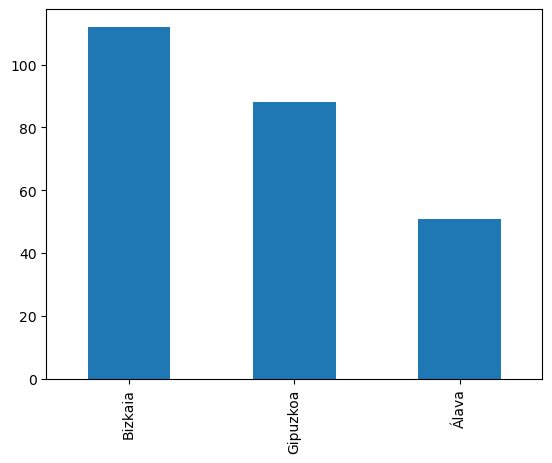

In [75]:
consumo['provincia'].value_counts().plot(kind="bar")

El parámetro `kind` es el tipo de gráfico
* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot
* ‘scatter’ : scatter plot (DataFrame only)
* ‘hexbin’ : hexbin plot (DataFrame only)

<Axes: ylabel='provincia'>

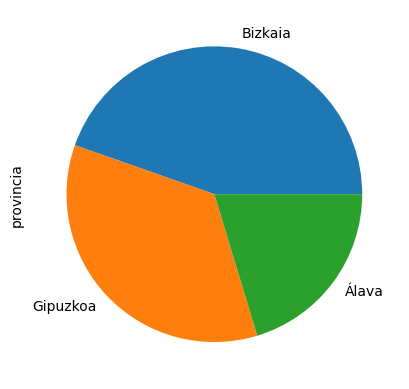

In [54]:
# Gráfica de las cantidades por cada valor en forma de tarta
consumo['provincia'].value_counts().plot(kind="pie")

## Cálculo de estadísticos básicos.

Convertimos a float (numerico) para poder trabajar con los datos

In [55]:
consumo.dtypes

Codigo municipio      int64
Municipio            object
2015                float64
2014                float64
2013                float64
2012                float64
2011                float64
2010                float64
2009                float64
2008                float64
2007                float64
2006                float64
2005                float64
2004                float64
2003                float64
2002                float64
provincia            object
dtype: object

Para hacer el cambio de tipos de una sola vez

### Media

Gasto medio por municipio.

In [56]:
consumo.loc[:,'2015':'2002']

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,20116.32,20306.64,19993.84,20328.15,19292.68,18073.94
1,1775.42,1976.36,2334.03,2674.67,2093.31,2324.47,2193.65,2301.17,2612.19,2015.60,2270.07,2186.96,2311.37,2289.61
2,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,6246.63,5714.46,5356.14,5042.83,4462.76,4227.28
3,31356.73,30456.01,31958.31,31283.90,30289.75,30512.82,29608.55,37226.58,37006.68,37842.85,36934.28,41027.15,36532.05,37132.90
4,6830.56,7063.86,7381.57,7450.48,7597.10,7508.26,7420.62,9284.10,10350.79,10289.29,10580.32,10380.22,9616.06,8897.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2088.98,1967.21,2155.81,2258.48,1611.92,1765.80,1795.82,1758.68,1259.54,1315.58,2668.96,4714.38,4608.56,4248.04
247,14627.46,13818.31,13382.69,17124.82,17584.41,18497.73,17724.03,16189.97,5803.96,5800.26,5373.82,5185.71,5159.19,5087.84
248,3475.49,3452.86,3585.49,3526.35,3733.28,3897.58,3880.25,4097.61,4205.70,4150.84,4064.04,4112.30,3967.08,3855.15
249,8866.33,8520.32,8485.99,8271.42,8032.16,7900.01,7374.67,9136.98,8739.55,9655.69,9093.28,8743.57,8313.31,7804.46


In [57]:
consumo.dtypes

Codigo municipio      int64
Municipio            object
2015                float64
2014                float64
2013                float64
2012                float64
2011                float64
2010                float64
2009                float64
2008                float64
2007                float64
2006                float64
2005                float64
2004                float64
2003                float64
2002                float64
provincia            object
dtype: object

Al usar `axis = 1` se aplica la media de manera horizontal.

In [58]:
consumo.loc[:,'2015':'2002'].mean(axis=1)

0      18630.027857
1       2239.920000
2       5582.539286
3      34226.325714
4       8617.900714
           ...     
246     2444.125714
247    11525.728571
248     3857.430000
249     8495.552857
250    52970.131429
Length: 251, dtype: float64

Puedo guardar el dato en una columna nueva

In [59]:
consumo['promedio'] = consumo.loc[:,'2015':'2002'].mean(axis=1)

In [60]:
consumo['promedio']

0      18630.027857
1       2239.920000
2       5582.539286
3      34226.325714
4       8617.900714
           ...     
246     2444.125714
247    11525.728571
248     3857.430000
249     8495.552857
250    52970.131429
Name: promedio, Length: 251, dtype: float64

In [61]:
consumo

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio
0,48001,Abadiño,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,20116.32,20306.64,19993.84,20328.15,19292.68,18073.94,Bizkaia,18630.027857
1,20001,Abaltzisketa,1775.42,1976.36,2334.03,2674.67,2093.31,2324.47,2193.65,2301.17,2612.19,2015.60,2270.07,2186.96,2311.37,2289.61,Gipuzkoa,2239.920000
2,48002,Abanto y Ciérvana-Abanto Zierbena,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,6246.63,5714.46,5356.14,5042.83,4462.76,4227.28,Bizkaia,5582.539286
3,20002,Aduna,31356.73,30456.01,31958.31,31283.90,30289.75,30512.82,29608.55,37226.58,37006.68,37842.85,36934.28,41027.15,36532.05,37132.90,Gipuzkoa,34226.325714
4,20016,Aia,6830.56,7063.86,7381.57,7450.48,7597.10,7508.26,7420.62,9284.10,10350.79,10289.29,10580.32,10380.22,9616.06,8897.38,Gipuzkoa,8617.900714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,48915,Ziortza-Bolibar,2088.98,1967.21,2155.81,2258.48,1611.92,1765.80,1795.82,1758.68,1259.54,1315.58,2668.96,4714.38,4608.56,4248.04,Bizkaia,2444.125714
247,20028,Zizurkil,14627.46,13818.31,13382.69,17124.82,17584.41,18497.73,17724.03,16189.97,5803.96,5800.26,5373.82,5185.71,5159.19,5087.84,Gipuzkoa,11525.728571
248,1063,Zuia,3475.49,3452.86,3585.49,3526.35,3733.28,3897.58,3880.25,4097.61,4205.70,4150.84,4064.04,4112.30,3967.08,3855.15,Álava,3857.430000
249,20081,Zumaia,8866.33,8520.32,8485.99,8271.42,8032.16,7900.01,7374.67,9136.98,8739.55,9655.69,9093.28,8743.57,8313.31,7804.46,Gipuzkoa,8495.552857


Si quisieramos el consumo medio por año tendríamos que crearlo en una serie independiente ya que el numero de elementos no coincide ni con el número de filas ni el de columnas.

In [62]:
consumopromedio = consumo.loc[:,'2015':'2002'].mean(axis=0)

In [63]:
consumopromedio

2015    12605.363825
2014    12447.753865
2013    12113.322869
2012    12586.729124
2011    12983.042550
2010    12930.964223
2009    11798.075219
2008    14604.023984
2007    14566.509363
2006    14484.171833
2005    13969.053108
2004    14170.723904
2003    13481.837211
2002    13179.421833
dtype: float64

### Suma

Sumatorio del gasto por municipio

In [64]:
sum_gasto = consumo.loc[:,'2015':'2002'].sum(axis=1)
type(sum_gasto)

pandas.core.series.Series

In [65]:
sum_gasto

0      260820.39
1       31358.88
2       78155.55
3      479168.56
4      120650.61
         ...    
246     34217.76
247    161360.20
248     54004.02
249    118937.74
250    741581.84
Length: 251, dtype: float64

Lo podemos añadir como nueva columna

In [66]:
consumo["total_Suma_ano"] = sum_gasto

In [67]:
consumo["total_Suma_ano"]

0      260820.39
1       31358.88
2       78155.55
3      479168.56
4      120650.61
         ...    
246     34217.76
247    161360.20
248     54004.02
249    118937.74
250    741581.84
Name: total_Suma_ano, Length: 251, dtype: float64

In [68]:
consumo.head()

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio,total_Suma_ano
0,48001,Abadiño,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,20116.32,20306.64,19993.84,20328.15,19292.68,18073.94,Bizkaia,18630.027857,260820.39
1,20001,Abaltzisketa,1775.42,1976.36,2334.03,2674.67,2093.31,2324.47,2193.65,2301.17,2612.19,2015.60,2270.07,2186.96,2311.37,2289.61,Gipuzkoa,2239.920000,31358.88
2,48002,Abanto y Ciérvana-Abanto Zierbena,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,6246.63,5714.46,5356.14,5042.83,4462.76,4227.28,Bizkaia,5582.539286,78155.55
3,20002,Aduna,31356.73,30456.01,31958.31,31283.90,30289.75,30512.82,29608.55,37226.58,37006.68,37842.85,36934.28,41027.15,36532.05,37132.90,Gipuzkoa,34226.325714,479168.56
4,20016,Aia,6830.56,7063.86,7381.57,7450.48,7597.10,7508.26,7420.62,9284.10,10350.79,10289.29,10580.32,10380.22,9616.06,8897.38,Gipuzkoa,8617.900714,120650.61


## Columna categórica a partir de los datos

Creamos una variable que nos indique si el municipio es un pueblo o una ciudad en base a un límite que establacemos (por ejemplo 50.000)

In [69]:
consumo['pueblociudad']='xxx'

In [70]:
consumo.head(5)

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad
0,48001,Abadiño,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,20116.32,20306.64,19993.84,20328.15,19292.68,18073.94,Bizkaia,18630.027857,260820.39,xxx
1,20001,Abaltzisketa,1775.42,1976.36,2334.03,2674.67,2093.31,2324.47,2193.65,2301.17,2612.19,2015.60,2270.07,2186.96,2311.37,2289.61,Gipuzkoa,2239.920000,31358.88,xxx
2,48002,Abanto y Ciérvana-Abanto Zierbena,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,6246.63,5714.46,5356.14,5042.83,4462.76,4227.28,Bizkaia,5582.539286,78155.55,xxx
3,20002,Aduna,31356.73,30456.01,31958.31,31283.90,30289.75,30512.82,29608.55,37226.58,37006.68,37842.85,36934.28,41027.15,36532.05,37132.90,Gipuzkoa,34226.325714,479168.56,xxx
4,20016,Aia,6830.56,7063.86,7381.57,7450.48,7597.10,7508.26,7420.62,9284.10,10350.79,10289.29,10580.32,10380.22,9616.06,8897.38,Gipuzkoa,8617.900714,120650.61,xxx


In [71]:
consumo.loc[consumo["2012"] < 50000, 'pueblociudad'] = "Pueblo"
consumo.loc[consumo["2012"] >=50000, 'pueblociudad'] = "Ciudad"

In [72]:
consumo

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad
0,48001,Abadiño,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,20116.32,20306.64,19993.84,20328.15,19292.68,18073.94,Bizkaia,18630.027857,260820.39,Pueblo
1,20001,Abaltzisketa,1775.42,1976.36,2334.03,2674.67,2093.31,2324.47,2193.65,2301.17,2612.19,2015.60,2270.07,2186.96,2311.37,2289.61,Gipuzkoa,2239.920000,31358.88,Pueblo
2,48002,Abanto y Ciérvana-Abanto Zierbena,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,6246.63,5714.46,5356.14,5042.83,4462.76,4227.28,Bizkaia,5582.539286,78155.55,Pueblo
3,20002,Aduna,31356.73,30456.01,31958.31,31283.90,30289.75,30512.82,29608.55,37226.58,37006.68,37842.85,36934.28,41027.15,36532.05,37132.90,Gipuzkoa,34226.325714,479168.56,Pueblo
4,20016,Aia,6830.56,7063.86,7381.57,7450.48,7597.10,7508.26,7420.62,9284.10,10350.79,10289.29,10580.32,10380.22,9616.06,8897.38,Gipuzkoa,8617.900714,120650.61,Pueblo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,48915,Ziortza-Bolibar,2088.98,1967.21,2155.81,2258.48,1611.92,1765.80,1795.82,1758.68,1259.54,1315.58,2668.96,4714.38,4608.56,4248.04,Bizkaia,2444.125714,34217.76,Pueblo
247,20028,Zizurkil,14627.46,13818.31,13382.69,17124.82,17584.41,18497.73,17724.03,16189.97,5803.96,5800.26,5373.82,5185.71,5159.19,5087.84,Gipuzkoa,11525.728571,161360.20,Pueblo
248,1063,Zuia,3475.49,3452.86,3585.49,3526.35,3733.28,3897.58,3880.25,4097.61,4205.70,4150.84,4064.04,4112.30,3967.08,3855.15,Álava,3857.430000,54004.02,Pueblo
249,20081,Zumaia,8866.33,8520.32,8485.99,8271.42,8032.16,7900.01,7374.67,9136.98,8739.55,9655.69,9093.28,8743.57,8313.31,7804.46,Gipuzkoa,8495.552857,118937.74,Pueblo


Comprobamos la distribución de categorías en la columna creada

<Axes: >

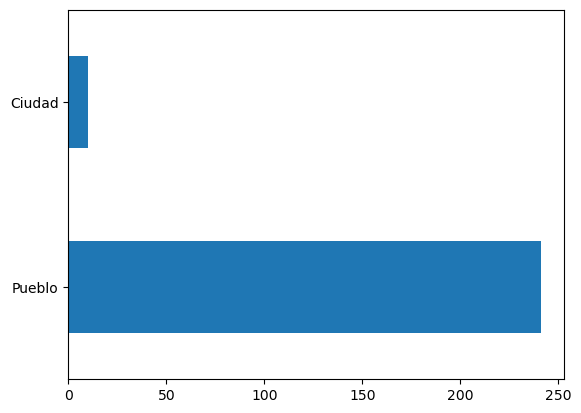

In [73]:
consumo['pueblociudad'].value_counts()
consumo['pueblociudad'].value_counts().plot(kind="barh")

### Ordenaciones `sort_values()`

Municipios con Menor/Mayor Consumo.

Orden ascendente por la variable 2015

In [74]:
municmenor = consumo.sort_values('2015')
municmenor.head(10)

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad
23,1003,Aramaio,1592.50,1607.83,1668.04,1448.28,1570.50,1462.92,2423.78,3701.04,3832.42,3547.12,3740.30,4074.74,3564.48,3471.46,Álava,2693.243571,37705.41,Pueblo
146,20048,Larraul,1674.55,1668.96,1766.28,1951.52,1930.52,2082.68,2177.75,2463.23,2115.09,2319.63,2352.10,2205.23,1979.05,1957.89,Gipuzkoa,2046.034286,28644.48,Pueblo
215,20071,Tolosa,1773.90,1667.35,1762.54,1778.96,1917.83,1928.24,3303.24,5414.36,3649.84,4062.46,4621.46,4476.38,3997.39,3876.97,Gipuzkoa,3159.351429,44230.92,Pueblo
1,20001,Abaltzisketa,1775.42,1976.36,2334.03,2674.67,2093.31,2324.47,2193.65,2301.17,2612.19,2015.60,2270.07,2186.96,2311.37,2289.61,Gipuzkoa,2239.920000,31358.88,Pueblo
184,1041,Navaridas,1783.43,1853.26,1868.78,1957.14,1985.35,2070.67,1941.88,2077.65,1803.80,2061.80,2054.27,1923.25,1893.03,1839.29,Álava,1936.685714,27113.60,Pueblo
109,20907,Gaztelu,1802.34,1727.45,1916.81,2139.46,1969.76,1906.25,1976.43,1803.59,1934.28,1831.04,1834.50,1750.11,1769.51,1259.87,Gipuzkoa,1830.100000,25621.40,Pueblo
10,20006,Alkiza,1847.12,1749.31,1790.46,1840.93,2257.17,2414.52,2505.13,2760.22,2764.12,2621.50,2752.75,2719.15,2702.07,2413.43,Gipuzkoa,2366.991429,33137.88,Pueblo
170,48062,Mendata,1904.64,2004.44,2072.02,2125.72,2199.89,1982.41,2006.63,2152.52,2074.37,1931.15,1961.17,1866.15,1745.38,1606.09,Bizkaia,1973.755714,27632.58,Pueblo
233,1061,Zalduondo,1925.70,1828.50,1790.05,1953.00,2004.62,2206.62,2298.52,2199.41,2182.44,2250.42,2285.78,2055.69,2007.44,1903.44,Álava,2063.687857,28891.63,Pueblo
12,20906,Altzaga,1937.81,1928.58,1871.21,2244.02,2153.93,2308.54,1912.57,2545.16,2095.06,1988.41,1985.97,1169.77,3378.82,2426.39,Gipuzkoa,2139.017143,29946.24,Pueblo


Orden descendente

In [75]:
municmayor = consumo.sort_values('2015', ascending = False)
municmayor.head(10)

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad
187,20058,Olaberria,641676.36,640347.72,584314.63,636580.32,611536.81,559803.66,376899.12,644624.13,733540.73,723935.14,705097.82,750196.53,722920.04,668938.96,Gipuzkoa,642886.569286,9000411.97,Ciudad
5,20003,Aizarnazabal,101231.41,106143.00,111945.62,95357.66,120703.86,127260.11,107453.11,136313.18,140479.44,139652.55,154155.67,159191.20,156092.21,166830.79,Gipuzkoa,130200.700714,1822809.81,Ciudad
14,20008,Amezketa,81716.04,86473.23,84620.30,85430.87,79463.92,78681.30,76252.74,72733.49,15153.41,20851.11,14901.42,19532.19,19646.73,18187.59,Gipuzkoa,53831.738571,753644.34,Ciudad
143,1902,Lantarón,73756.60,70371.42,64409.57,77229.22,57629.47,58320.34,51315.13,63357.07,61607.52,81602.34,61087.14,64977.34,62703.90,55790.31,Álava,64582.669286,904157.37,Ciudad
179,48071,Muskiz,68820.68,55164.21,4483.40,4226.17,5402.17,14054.50,9982.39,14768.04,13249.53,10707.40,11065.08,6549.77,8214.59,7088.79,Bizkaia,16698.337143,233776.72,Pueblo
132,48910,Iurreta,64470.31,64470.31,63071.50,62756.86,62095.40,61764.55,60213.50,55982.87,69677.76,50480.64,57126.37,52909.33,51124.64,49757.94,Bizkaia,58992.998571,825901.98,Ciudad
6,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,3348.66,3120.09,3138.43,3308.67,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad
42,48091,Atxondo,59203.49,56101.82,56977.81,53510.09,50507.03,44763.49,38322.62,51247.56,57651.03,57339.87,57649.03,60277.70,59366.20,57474.90,Bizkaia,54313.760000,760392.64,Ciudad
97,48030,Etxebarria,55531.54,52542.84,50444.61,50851.25,49067.37,45882.35,37776.68,44308.51,42611.81,40321.32,38303.09,41210.90,39296.90,30651.88,Bizkaia,44200.075000,618801.05,Ciudad
98,20035,Ezkio-Itsaso,52882.22,55544.41,52364.27,51779.68,49692.21,43497.81,41149.54,54728.11,59088.86,55887.65,49610.60,44619.04,41693.82,40597.67,Gipuzkoa,49509.706429,693135.89,Ciudad


In [76]:
municmenor.tail(10)

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad
98,20035,Ezkio-Itsaso,52882.22,55544.41,52364.27,51779.68,49692.21,43497.81,41149.54,54728.11,59088.86,55887.65,49610.60,44619.04,41693.82,40597.67,Gipuzkoa,49509.706429,693135.89,Ciudad
97,48030,Etxebarria,55531.54,52542.84,50444.61,50851.25,49067.37,45882.35,37776.68,44308.51,42611.81,40321.32,38303.09,41210.90,39296.90,30651.88,Bizkaia,44200.075000,618801.05,Ciudad
42,48091,Atxondo,59203.49,56101.82,56977.81,53510.09,50507.03,44763.49,38322.62,51247.56,57651.03,57339.87,57649.03,60277.70,59366.20,57474.90,Bizkaia,54313.760000,760392.64,Ciudad
6,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,3348.66,3120.09,3138.43,3308.67,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad
132,48910,Iurreta,64470.31,64470.31,63071.50,62756.86,62095.40,61764.55,60213.50,55982.87,69677.76,50480.64,57126.37,52909.33,51124.64,49757.94,Bizkaia,58992.998571,825901.98,Ciudad
179,48071,Muskiz,68820.68,55164.21,4483.40,4226.17,5402.17,14054.50,9982.39,14768.04,13249.53,10707.40,11065.08,6549.77,8214.59,7088.79,Bizkaia,16698.337143,233776.72,Pueblo
143,1902,Lantarón,73756.60,70371.42,64409.57,77229.22,57629.47,58320.34,51315.13,63357.07,61607.52,81602.34,61087.14,64977.34,62703.90,55790.31,Álava,64582.669286,904157.37,Ciudad
14,20008,Amezketa,81716.04,86473.23,84620.30,85430.87,79463.92,78681.30,76252.74,72733.49,15153.41,20851.11,14901.42,19532.19,19646.73,18187.59,Gipuzkoa,53831.738571,753644.34,Ciudad
5,20003,Aizarnazabal,101231.41,106143.00,111945.62,95357.66,120703.86,127260.11,107453.11,136313.18,140479.44,139652.55,154155.67,159191.20,156092.21,166830.79,Gipuzkoa,130200.700714,1822809.81,Ciudad
187,20058,Olaberria,641676.36,640347.72,584314.63,636580.32,611536.81,559803.66,376899.12,644624.13,733540.73,723935.14,705097.82,750196.53,722920.04,668938.96,Gipuzkoa,642886.569286,9000411.97,Ciudad


## Consultas.

Selección de las observaciones de una determinada Provincia.


In [77]:
datosBizkaia   = consumo[consumo['provincia']=="Bizkaia"]
datosAlava     = consumo[consumo['provincia']=="Álava"]
datosGipuzkoa  = consumo[consumo['provincia']=="Gipuzkoa"]

In [78]:
datosBizkaia.head()

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad
0,48001,Abadiño,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,20116.32,20306.64,19993.84,20328.15,19292.68,18073.94,Bizkaia,18630.027857,260820.39,Pueblo
2,48002,Abanto y Ciérvana-Abanto Zierbena,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,6246.63,5714.46,5356.14,5042.83,4462.76,4227.28,Bizkaia,5582.539286,78155.55,Pueblo
6,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,3348.66,3120.09,3138.43,3308.67,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad
11,48912,Alonsotegi,7325.72,7258.62,7465.17,6843.29,7686.73,9057.94,9871.74,11557.27,10189.12,10429.98,10179.93,10831.03,11215.78,10877.86,Bizkaia,9342.155714,130790.18,Pueblo
15,48003,Amorebieta-Etxano,11817.98,11374.13,11298.30,11564.69,11367.16,11571.38,11101.44,14162.03,14282.98,14261.30,14104.71,13906.98,13453.65,13256.15,Bizkaia,12680.205714,177522.88,Pueblo


Consumo Máximo/Mínimo

In [79]:
menorconsumo = min(consumo['promedio'])
mayorconsumo = max(consumo['promedio'])

In [80]:
print("menor consumo de promedio: ", menorconsumo)
print("mayor consumo de promedio: ", mayorconsumo)          

menor consumo de promedio:  1830.1
mayor consumo de promedio:  642886.5692857143


Extraemos el nombre del municipio con mayor/menor consumo

In [81]:
consumo['promedio'] == consumo['promedio'].min()

0      False
1      False
2      False
3      False
4      False
       ...  
246    False
247    False
248    False
249    False
250    False
Name: promedio, Length: 251, dtype: bool

Este filtro nos puede servir ahora para extraer la fila buscada

In [82]:
consumo[consumo['promedio'] == consumo['promedio'].min()]

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad
109,20907,Gaztelu,1802.34,1727.45,1916.81,2139.46,1969.76,1906.25,1976.43,1803.59,1934.28,1831.04,1834.5,1750.11,1769.51,1259.87,Gipuzkoa,1830.1,25621.4,Pueblo


Si sólo nos interesa el nombre del municipio...

In [83]:
consumo['Municipio']

0                                Abadiño
1                           Abaltzisketa
2      Abanto y Ciérvana-Abanto Zierbena
3                                  Aduna
4                                    Aia
                     ...                
246                      Ziortza-Bolibar
247                             Zizurkil
248                                 Zuia
249                               Zumaia
250                            Zumarraga
Name: Municipio, Length: 251, dtype: object

In [84]:
muni_menor_consumo = consumo["Municipio"][consumo['promedio'] == menorconsumo]
# O bien:
muni_menor_consumo = consumo['Municipio'][consumo['promedio'] == consumo['promedio'].min()]
muni_menor_consumo

109    Gaztelu
Name: Municipio, dtype: object

In [85]:
muni_mayor_consumo = consumo[consumo['promedio'] == mayorconsumo]['Municipio']
# O bien:
muni_mayor_consumo = consumo['Municipio'][consumo['promedio'] == consumo['promedio'].max()]
muni_mayor_consumo

187    Olaberria
Name: Municipio, dtype: object

Ambos filtrados nos han devuelto un objeto de pandas. Con su fila y su columna. Si sólo quiero el valor de la celda (un string) tengo que acceder con `values`.

In [86]:
muni_mayor_consumo.values[0]

'Olaberria'

In [87]:
muni_menor_consumo.values[0]

'Gaztelu'

De la misma manera extraemos el nombre de la provincia en la que se encuentra el municipio con mayor/menor consumo

In [88]:
consumo['provincia']

0       Bizkaia
1      Gipuzkoa
2       Bizkaia
3      Gipuzkoa
4      Gipuzkoa
         ...   
246     Bizkaia
247    Gipuzkoa
248       Álava
249    Gipuzkoa
250    Gipuzkoa
Name: provincia, Length: 251, dtype: object

In [89]:
prov_menor_consumo = consumo['provincia'][consumo['promedio'] == menorconsumo]
prov_mayor_consumo = consumo['provincia'][consumo['promedio'] == mayorconsumo]

In [90]:
prov_menor_consumo

109    Gipuzkoa
Name: provincia, dtype: object

In [91]:
prov_mayor_consumo

187    Gipuzkoa
Name: provincia, dtype: object

### Consultas con agregaciones

Hacer agrupaciones me permite hacer un resumen estadístico de los datos cuando tengo alguna columna categórica.

El resumen resultante tendrá tantas filas como categorías tenga la variable elegida para agrupar.

Pero, ¿Qué hace con el resto de columnas? Si tiene que agrupar los valores de esa columna le tengo que decir qué cálculo realizar con los múltiples valores a agrupar. Un cálculo de "agregación".

Pongamos que le digo que agrupe los datos sumándolos.

In [92]:
agrupacion = consumo.groupby(['provincia']).agg("sum")
agrupacion.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2528\2361415295.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupacion = consumo.groupby(['provincia']).agg("sum")


,Codigo municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,promedio,total_Suma_ano
provincia,,,,,,,,,,,,,,,,,
Bizkaia,5394373,1078305.11,1030513.26,970252.41,1001914.86,1066756.39,1093051.76,1036529.52,1201830.96,1138995.16,1104694.48,1078753.14,1070563.16,1002252.04,970365.34,1.060341e+06,14844777.59
Gipuzkoa,1769649,1565879.96,1575313.20,1564899.99,1624252.62,1656195.25,1631074.34,1423914.17,1855829.10,1908314.55,1902322.10,1849477.40,1906365.89,1826226.24,1798592.16,1.720618e+06,24088656.97
Álava,54420,519761.25,518559.76,505291.64,533101.53,535792.04,521545.92,500873.19,607949.96,608884.14,628510.55,578001.79,579922.65,555462.86,539077.38,5.523382e+05,7732734.66


Las columnas "Municipio" y "pueblociudad" son de texto, así que al sumar los strings los ha concatenado.

Al menos, esto lo puede hacer, ya que si le hubiera pedido que agregara con la media habría sido imposible.

Voy a eliminar las columnas de texto y a calcular el consumo medio por provincia

In [93]:
consumo_num = consumo.drop(["Municipio", "pueblociudad"], axis = 1)

In [94]:
agrupacion = consumo_num.groupby(['provincia']).agg("mean")

In [95]:
agrupacion

,Codigo municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,promedio,total_Suma_ano
provincia,,,,,,,,,,,,,,,,,
Bizkaia,48164.044643,9627.724196,9201.011250,8662.967946,8945.668393,9524.610625,9759.390714,9254.727857,10730.633571,10169.599643,9863.343571,9631.724464,9558.599643,8948.678929,8663.976250,9467.332647,132542.657054
Gipuzkoa,20109.647727,17794.090455,17901.286364,17782.954432,18457.416136,18820.400568,18534.935682,16180.842841,21088.967045,21685.392614,21617.296591,21016.788636,21663.248750,20752.570909,20438.547273,19552.481307,273734.738295
Álava,1067.058824,10191.397059,10167.838431,9907.679216,10452.971176,10505.726275,10226.390588,9821.042941,11920.587451,11938.904706,12323.736275,11333.368431,11371.032353,10891.428627,10570.144706,10830.160588,151622.248235


In [97]:
agrupacion.loc[["Bizkaia","Álava"], "2015"]

provincia
Bizkaia     9627.724196
Álava      10191.397059
Name: 2015, dtype: float64

In [98]:
consmedioprov = consumo_num.groupby(['provincia']).agg("mean").reset_index()
consmedioprov

,provincia,Codigo municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,promedio,total_Suma_ano
0,Bizkaia,48164.044643,9627.724196,9201.011250,8662.967946,8945.668393,9524.610625,9759.390714,9254.727857,10730.633571,10169.599643,9863.343571,9631.724464,9558.599643,8948.678929,8663.976250,9467.332647,132542.657054
1,Gipuzkoa,20109.647727,17794.090455,17901.286364,17782.954432,18457.416136,18820.400568,18534.935682,16180.842841,21088.967045,21685.392614,21617.296591,21016.788636,21663.248750,20752.570909,20438.547273,19552.481307,273734.738295
2,Álava,1067.058824,10191.397059,10167.838431,9907.679216,10452.971176,10505.726275,10226.390588,9821.042941,11920.587451,11938.904706,12323.736275,11333.368431,11371.032353,10891.428627,10570.144706,10830.160588,151622.248235


In [99]:
consmedioprov = consmedioprov.loc[:,('provincia','promedio')]

In [101]:
consmedioprov

,provincia,promedio
0,Bizkaia,9467.332647
1,Gipuzkoa,19552.481307
2,Álava,10830.160588


Todo en un único paso

In [104]:
consmedioprov2 = (consumo_num.loc[:,('provincia','promedio')]).groupby(['provincia',]).agg("mean").reset_index()

In [105]:
consmedioprov2

,provincia,promedio
0,Bizkaia,9467.332647
1,Gipuzkoa,19552.481307
2,Álava,10830.160588


Consumo  total por provincia

In [107]:
constotprov = consumo_num.groupby(['provincia']).agg("sum").reset_index()


In [ ]:
constotprov = constotprov.loc[:,('provincia','Suma')]

KeyError: "['Sum'] not in index"

In [110]:
constotprov

,provincia,Codigo municipio,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,promedio,total_Suma_ano
0,Bizkaia,5394373,1078305.11,1030513.26,970252.41,1001914.86,1066756.39,1093051.76,1036529.52,1201830.96,1138995.16,1104694.48,1078753.14,1070563.16,1002252.04,970365.34,1.060341e+06,14844777.59
1,Gipuzkoa,1769649,1565879.96,1575313.20,1564899.99,1624252.62,1656195.25,1631074.34,1423914.17,1855829.10,1908314.55,1902322.10,1849477.40,1906365.89,1826226.24,1798592.16,1.720618e+06,24088656.97
2,Álava,54420,519761.25,518559.76,505291.64,533101.53,535792.04,521545.92,500873.19,607949.96,608884.14,628510.55,578001.79,579922.65,555462.86,539077.38,5.523382e+05,7732734.66


Todo en un único paso

In [111]:
constotprov2 = (consumo.loc[:,('provincia','Suma')]).groupby(['provincia',]).agg("sum").reset_index()

KeyError: "['Suma'] not in index"

In [112]:
constotprov2

NameError: name 'constotprov2' is not defined

## Operaciones con variables.

Consumo por categorías Alto/Medio/Bajo.

Podemos clasificar los municipios en consumo alto/medio/bajo según sus percentiles

In [113]:
consumo_p33_prov = consumo_num["promedio"].groupby(consumo['provincia']).quantile(q=0.33).reset_index()

In [114]:
consumo_p33_prov

,provincia,promedio
0,Bizkaia,3108.363543
1,Gipuzkoa,4173.691993
2,Álava,4090.734286


In [115]:
consumo_p66_prov = consumo["promedio"].groupby(consumo['provincia']).quantile(q=0.67).reset_index()

In [116]:
consumo_p66_prov

,provincia,promedio
0,Bizkaia,6738.368436
1,Gipuzkoa,9100.159107
2,Álava,10106.950000


## Unión de varias tablas.

Unimos los resultados obtenidos en una única tabla

Los unimos utilizando la columna común 'provincia' como clave para indicar las filas que se corresponden.

In [120]:
consum_33_66 = pd.merge(consumo_p33_prov, consumo_p66_prov, on='provincia')

In [121]:
consum_33_66

,provincia,promedio_x,promedio_y
0,Bizkaia,3108.363543,6738.368436
1,Gipuzkoa,4173.691993,9100.159107
2,Álava,4090.734286,10106.950000


Hay que cambiar el nombre a las variables/columnas (axis=1)

In [122]:
consum_33_66 = consum_33_66.rename({'promedio_x':'p33','promedio_y':'p66'},axis=1)
consum_33_66

,provincia,p33,p66
0,Bizkaia,3108.363543,6738.368436
1,Gipuzkoa,4173.691993,9100.159107
2,Álava,4090.734286,10106.950000


Ahora lo unimos con el dataset

In [123]:
consumo = pd.merge(consumo, consum_33_66, on = 'provincia')

In [124]:
consumo

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,...,2005,2004,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad,p33,p66
0,48001,Abadiño,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,...,19993.84,20328.15,19292.68,18073.94,Bizkaia,18630.027857,260820.39,Pueblo,3108.363543,6738.368436
1,48002,Abanto y Ciérvana-Abanto Zierbena,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,...,5356.14,5042.83,4462.76,4227.28,Bizkaia,5582.539286,78155.55,Pueblo,3108.363543,6738.368436
2,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,...,3138.43,3308.67,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad,3108.363543,6738.368436
3,48912,Alonsotegi,7325.72,7258.62,7465.17,6843.29,7686.73,9057.94,9871.74,11557.27,...,10179.93,10831.03,11215.78,10877.86,Bizkaia,9342.155714,130790.18,Pueblo,3108.363543,6738.368436
4,48003,Amorebieta-Etxano,11817.98,11374.13,11298.30,11564.69,11367.16,11571.38,11101.44,14162.03,...,14104.71,13906.98,13453.65,13256.15,Bizkaia,12680.205714,177522.88,Pueblo,3108.363543,6738.368436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1060,Yécora/Iekora,2698.08,2628.62,2538.50,2292.58,2301.46,2322.42,2262.48,2231.50,...,2024.18,2066.56,1975.36,1827.21,Álava,2239.462143,31352.47,Pueblo,4090.734286,10106.950000
247,1061,Zalduondo,1925.70,1828.50,1790.05,1953.00,2004.62,2206.62,2298.52,2199.41,...,2285.78,2055.69,2007.44,1903.44,Álava,2063.687857,28891.63,Pueblo,4090.734286,10106.950000
248,1062,Zambrana,4192.68,4619.36,5610.75,4548.76,4665.81,5192.65,5710.84,8007.79,...,7684.88,7552.27,7899.74,7374.46,Álava,6537.943571,91531.21,Pueblo,4090.734286,10106.950000
249,1018,Zigoitia,13224.36,13648.62,15038.86,15556.49,17391.52,18024.80,18739.66,21107.03,...,24836.76,25443.08,25999.79,25330.42,Álava,19966.630000,279532.82,Pueblo,4090.734286,10106.950000


Una vez que tenemos los valores, podemos realizar la clasificación. Muy similar a cuando creamos la columna "provincia" pero ahora la comparación no se hace con un número fijo sino con el valor de otra columna.

In [125]:
consumo['consumoProvincia']='xxx'

consumo.loc[consumo["promedio"] < consumo['p33'], 'consumoProvincia'] = "Bajo"

consumo.loc[(consumo["promedio"] > consumo['p33']) &
            (consumo["promedio"] < consumo['p66']), 'consumoProvincia'] = "Medio"

consumo.loc[consumo["promedio"] > consumo['p66'], 'consumoProvincia'] = "Alto"

In [135]:
consumo["consumoProvincia"].value_counts()

Medio    85
Alto     83
Bajo     83
Name: consumoProvincia, dtype: int64

In [136]:
consumo

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,...,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad,p33,p66,consumoProvincia,dif1502
0,48001,Abadiño,19112.86,18218.65,17007.75,17492.94,19038.20,17434.98,14902.98,19500.46,...,19292.68,18073.94,Bizkaia,18630.027857,260820.39,Pueblo,3108.363543,6738.368436,Alto,1038.92
1,48002,Abanto y Ciérvana-Abanto Zierbena,6626.98,6766.62,6226.93,5921.76,5488.18,5228.24,4835.82,6010.92,...,4462.76,4227.28,Bizkaia,5582.539286,78155.55,Pueblo,3108.363543,6738.368436,Medio,2399.70
2,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,...,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad,3108.363543,6738.368436,Alto,57845.17
3,48912,Alonsotegi,7325.72,7258.62,7465.17,6843.29,7686.73,9057.94,9871.74,11557.27,...,11215.78,10877.86,Bizkaia,9342.155714,130790.18,Pueblo,3108.363543,6738.368436,Alto,-3552.14
4,48003,Amorebieta-Etxano,11817.98,11374.13,11298.30,11564.69,11367.16,11571.38,11101.44,14162.03,...,13453.65,13256.15,Bizkaia,12680.205714,177522.88,Pueblo,3108.363543,6738.368436,Alto,-1438.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1060,Yécora/Iekora,2698.08,2628.62,2538.50,2292.58,2301.46,2322.42,2262.48,2231.50,...,1975.36,1827.21,Álava,2239.462143,31352.47,Pueblo,4090.734286,10106.950000,Bajo,870.87
247,1061,Zalduondo,1925.70,1828.50,1790.05,1953.00,2004.62,2206.62,2298.52,2199.41,...,2007.44,1903.44,Álava,2063.687857,28891.63,Pueblo,4090.734286,10106.950000,Bajo,22.26
248,1062,Zambrana,4192.68,4619.36,5610.75,4548.76,4665.81,5192.65,5710.84,8007.79,...,7899.74,7374.46,Álava,6537.943571,91531.21,Pueblo,4090.734286,10106.950000,Medio,-3181.78
249,1018,Zigoitia,13224.36,13648.62,15038.86,15556.49,17391.52,18024.80,18739.66,21107.03,...,25999.79,25330.42,Álava,19966.630000,279532.82,Pueblo,4090.734286,10106.950000,Alto,-12106.06


## Cálculos numéricos con columnas

Diferencias a lo largo del periodo. Sólo tenemos en cuenta el primer y último año

In [137]:
consumo['dif1502'] = consumo['2015'] - consumo['2002']

In [143]:
sub = consumo.loc[:, ['2015', '2002', 'dif1502']]

In [145]:
sub

,2015,2002,dif1502
0,19112.86,18073.94,1038.92
1,6626.98,4227.28,2399.70
2,60798.19,2953.02,57845.17
3,7325.72,10877.86,-3552.14
4,11817.98,13256.15,-1438.17
...,...,...,...
246,2698.08,1827.21,870.87
247,1925.70,1903.44,22.26
248,4192.68,7374.46,-3181.78
249,13224.36,25330.42,-12106.06


Y ordenarlos segun esas diferencias

In [146]:
consumo2 = consumo.sort_values('dif1502')

In [147]:
consumo2

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,...,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad,p33,p66,consumoProvincia,dif1502
139,20023,Berrobi,2411.14,8374.65,36029.70,37091.56,35876.25,37624.60,47023.18,58957.86,...,59297.30,68970.45,Gipuzkoa,46545.312857,651634.38,Pueblo,4173.691993,9100.159107,Alto,-66559.31
115,20003,Aizarnazabal,101231.41,106143.00,111945.62,95357.66,120703.86,127260.11,107453.11,136313.18,...,156092.21,166830.79,Gipuzkoa,130200.700714,1822809.81,Ciudad,4173.691993,9100.159107,Alto,-65599.38
132,20018,Azpeitia,5297.03,5056.98,8354.20,12603.00,26063.97,49041.69,60215.32,57895.92,...,46566.32,45918.27,Gipuzkoa,38189.010714,534646.15,Pueblo,4173.691993,9100.159107,Alto,-40621.24
177,20058,Olaberria,641676.36,640347.72,584314.63,636580.32,611536.81,559803.66,376899.12,644624.13,...,722920.04,668938.96,Gipuzkoa,642886.569286,9000411.97,Ciudad,4173.691993,9100.159107,Alto,-27262.60
140,20024,Bidania-Goiatz,11541.67,11310.44,10663.47,10841.22,11725.58,13278.90,14466.64,22180.60,...,30752.24,34126.41,Gipuzkoa,21069.189286,294968.65,Pueblo,4173.691993,9100.159107,Alto,-22584.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,48030,Etxebarria,55531.54,52542.84,50444.61,50851.25,49067.37,45882.35,37776.68,44308.51,...,39296.90,30651.88,Bizkaia,44200.075000,618801.05,Ciudad,3108.363543,6738.368436,Alto,24879.66
110,48913,Zierbena,45732.44,34891.95,30812.56,36686.19,39654.72,47372.97,49162.84,55604.65,...,20059.96,16554.04,Bizkaia,39794.665714,557125.32,Pueblo,3108.363543,6738.368436,Alto,29178.40
2,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,...,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad,3108.363543,6738.368436,Alto,57845.17
83,48071,Muskiz,68820.68,55164.21,4483.40,4226.17,5402.17,14054.50,9982.39,14768.04,...,8214.59,7088.79,Bizkaia,16698.337143,233776.72,Pueblo,3108.363543,6738.368436,Alto,61731.89


## Muestra de datos.

Y mostrar los 10 en los que más se ha incrementado o disminuido el consumo

In [148]:
consumo2.head(n=10)

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,...,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad,p33,p66,consumoProvincia,dif1502
139,20023,Berrobi,2411.14,8374.65,36029.70,37091.56,35876.25,37624.60,47023.18,58957.86,...,59297.30,68970.45,Gipuzkoa,46545.312857,651634.38,Pueblo,4173.691993,9100.159107,Alto,-66559.31
115,20003,Aizarnazabal,101231.41,106143.00,111945.62,95357.66,120703.86,127260.11,107453.11,136313.18,...,156092.21,166830.79,Gipuzkoa,130200.700714,1822809.81,Ciudad,4173.691993,9100.159107,Alto,-65599.38
132,20018,Azpeitia,5297.03,5056.98,8354.20,12603.00,26063.97,49041.69,60215.32,57895.92,...,46566.32,45918.27,Gipuzkoa,38189.010714,534646.15,Pueblo,4173.691993,9100.159107,Alto,-40621.24
177,20058,Olaberria,641676.36,640347.72,584314.63,636580.32,611536.81,559803.66,376899.12,644624.13,...,722920.04,668938.96,Gipuzkoa,642886.569286,9000411.97,Ciudad,4173.691993,9100.159107,Alto,-27262.60
140,20024,Bidania-Goiatz,11541.67,11310.44,10663.47,10841.22,11725.58,13278.90,14466.64,22180.60,...,30752.24,34126.41,Gipuzkoa,21069.189286,294968.65,Pueblo,4173.691993,9100.159107,Alto,-22584.74
138,20074,Bergara,7759.32,7709.92,6994.57,7847.65,7729.88,7975.14,16293.64,28041.52,...,30963.79,29308.60,Gipuzkoa,19507.106429,273099.49,Pueblo,4173.691993,9100.159107,Alto,-21549.28
107,48097,Zaratamo,8136.56,7874.74,8535.16,9003.90,10258.36,11248.40,19911.73,16041.19,...,26768.73,25817.61,Bizkaia,17819.241429,249469.38,Pueblo,3108.363543,6738.368436,Alto,-17681.05
39,48029,Etxebarri,10735.80,9408.95,10463.81,12618.29,13689.44,15284.89,14992.94,21636.04,...,23083.15,24700.20,Bizkaia,17528.899286,245404.59,Pueblo,3108.363543,6738.368436,Alto,-13964.40
160,20044,Ikaztegieta,6150.02,6218.76,5936.70,6692.61,6237.16,5952.60,5288.08,6261.94,...,10173.54,19597.57,Gipuzkoa,7785.899286,109002.59,Pueblo,4173.691993,9100.159107,Medio,-13447.55
231,1058,Legutio,50151.14,50577.99,50211.83,52570.11,61092.11,59709.57,51795.41,73821.56,...,63040.52,63320.08,Álava,59911.134286,838755.88,Ciudad,4090.734286,10106.950000,Alto,-13168.94


In [149]:
consumo2.tail(n=10)

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,...,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad,p33,p66,consumoProvincia,dif1502
197,20028,Zizurkil,14627.46,13818.31,13382.69,17124.82,17584.41,18497.73,17724.03,16189.97,...,5159.19,5087.84,Gipuzkoa,11525.728571,161360.20,Pueblo,4173.691993,9100.159107,Alto,9539.62
150,20035,Ezkio-Itsaso,52882.22,55544.41,52364.27,51779.68,49692.21,43497.81,41149.54,54728.11,...,41693.82,40597.67,Gipuzkoa,49509.706429,693135.89,Ciudad,4173.691993,9100.159107,Alto,12284.55
58,48910,Iurreta,64470.31,64470.31,63071.50,62756.86,62095.40,61764.55,60213.50,55982.87,...,51124.64,49757.94,Bizkaia,58992.998571,825901.98,Ciudad,3108.363543,6738.368436,Alto,14712.37
212,1014,Berantevilla,38542.53,40598.51,41719.45,41568.66,41685.48,35289.13,35287.67,42572.91,...,26317.28,21787.39,Álava,36600.832857,512411.66,Pueblo,4090.734286,10106.950000,Alto,16755.14
228,1902,Lantarón,73756.60,70371.42,64409.57,77229.22,57629.47,58320.34,51315.13,63357.07,...,62703.90,55790.31,Álava,64582.669286,904157.37,Ciudad,4090.734286,10106.950000,Alto,17966.29
40,48030,Etxebarria,55531.54,52542.84,50444.61,50851.25,49067.37,45882.35,37776.68,44308.51,...,39296.90,30651.88,Bizkaia,44200.075000,618801.05,Ciudad,3108.363543,6738.368436,Alto,24879.66
110,48913,Zierbena,45732.44,34891.95,30812.56,36686.19,39654.72,47372.97,49162.84,55604.65,...,20059.96,16554.04,Bizkaia,39794.665714,557125.32,Pueblo,3108.363543,6738.368436,Alto,29178.40
2,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,...,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad,3108.363543,6738.368436,Alto,57845.17
83,48071,Muskiz,68820.68,55164.21,4483.40,4226.17,5402.17,14054.50,9982.39,14768.04,...,8214.59,7088.79,Bizkaia,16698.337143,233776.72,Pueblo,3108.363543,6738.368436,Alto,61731.89
121,20008,Amezketa,81716.04,86473.23,84620.30,85430.87,79463.92,78681.30,76252.74,72733.49,...,19646.73,18187.59,Gipuzkoa,53831.738571,753644.34,Ciudad,4173.691993,9100.159107,Alto,63528.45


Podemos mostrar las columnas que nos interese

In [150]:
consumo2.iloc[:,[0,1,-2,-1]].head(n=10)

,Codigo municipio,Municipio,consumoProvincia,dif1502
139,20023,Berrobi,Alto,-66559.31
115,20003,Aizarnazabal,Alto,-65599.38
132,20018,Azpeitia,Alto,-40621.24
177,20058,Olaberria,Alto,-27262.60
140,20024,Bidania-Goiatz,Alto,-22584.74
138,20074,Bergara,Alto,-21549.28
107,48097,Zaratamo,Alto,-17681.05
39,48029,Etxebarri,Alto,-13964.40
160,20044,Ikaztegieta,Medio,-13447.55
231,1058,Legutio,Alto,-13168.94


In [151]:
consumo2.iloc[:,[0,1,-2,-1]].tail(n=10)

,Codigo municipio,Municipio,consumoProvincia,dif1502
197,20028,Zizurkil,Alto,9539.62
150,20035,Ezkio-Itsaso,Alto,12284.55
58,48910,Iurreta,Alto,14712.37
212,1014,Berantevilla,Alto,16755.14
228,1902,Lantarón,Alto,17966.29
40,48030,Etxebarria,Alto,24879.66
110,48913,Zierbena,Alto,29178.40
2,48911,Ajangiz,Alto,57845.17
83,48071,Muskiz,Alto,61731.89
121,20008,Amezketa,Alto,63528.45


## Guardar los datos modificados en un CSV

In [152]:
consumo2.to_csv('prueba.csv', encoding = "utf-8", sep = ",", index = False)



In [154]:
consumo_recargado=pd.read_csv("prueba.csv",sep=",",encoding='utf-8')

In [155]:
consumo_recargado

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,...,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad,p33,p66,consumoProvincia,dif1502
0,20023,Berrobi,2411.14,8374.65,36029.70,37091.56,35876.25,37624.60,47023.18,58957.86,...,59297.30,68970.45,Gipuzkoa,46545.312857,651634.38,Pueblo,4173.691993,9100.159107,Alto,-66559.31
1,20003,Aizarnazabal,101231.41,106143.00,111945.62,95357.66,120703.86,127260.11,107453.11,136313.18,...,156092.21,166830.79,Gipuzkoa,130200.700714,1822809.81,Ciudad,4173.691993,9100.159107,Alto,-65599.38
2,20018,Azpeitia,5297.03,5056.98,8354.20,12603.00,26063.97,49041.69,60215.32,57895.92,...,46566.32,45918.27,Gipuzkoa,38189.010714,534646.15,Pueblo,4173.691993,9100.159107,Alto,-40621.24
3,20058,Olaberria,641676.36,640347.72,584314.63,636580.32,611536.81,559803.66,376899.12,644624.13,...,722920.04,668938.96,Gipuzkoa,642886.569286,9000411.97,Ciudad,4173.691993,9100.159107,Alto,-27262.60
4,20024,Bidania-Goiatz,11541.67,11310.44,10663.47,10841.22,11725.58,13278.90,14466.64,22180.60,...,30752.24,34126.41,Gipuzkoa,21069.189286,294968.65,Pueblo,4173.691993,9100.159107,Alto,-22584.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,48030,Etxebarria,55531.54,52542.84,50444.61,50851.25,49067.37,45882.35,37776.68,44308.51,...,39296.90,30651.88,Bizkaia,44200.075000,618801.05,Ciudad,3108.363543,6738.368436,Alto,24879.66
247,48913,Zierbena,45732.44,34891.95,30812.56,36686.19,39654.72,47372.97,49162.84,55604.65,...,20059.96,16554.04,Bizkaia,39794.665714,557125.32,Pueblo,3108.363543,6738.368436,Alto,29178.40
248,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,...,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad,3108.363543,6738.368436,Alto,57845.17
249,48071,Muskiz,68820.68,55164.21,4483.40,4226.17,5402.17,14054.50,9982.39,14768.04,...,8214.59,7088.79,Bizkaia,16698.337143,233776.72,Pueblo,3108.363543,6738.368436,Alto,61731.89


Observamos que al recargar el índice se ha perdido

In [153]:
consumo2

,Codigo municipio,Municipio,2015,2014,2013,2012,2011,2010,2009,2008,...,2003,2002,provincia,promedio,total_Suma_ano,pueblociudad,p33,p66,consumoProvincia,dif1502
139,20023,Berrobi,2411.14,8374.65,36029.70,37091.56,35876.25,37624.60,47023.18,58957.86,...,59297.30,68970.45,Gipuzkoa,46545.312857,651634.38,Pueblo,4173.691993,9100.159107,Alto,-66559.31
115,20003,Aizarnazabal,101231.41,106143.00,111945.62,95357.66,120703.86,127260.11,107453.11,136313.18,...,156092.21,166830.79,Gipuzkoa,130200.700714,1822809.81,Ciudad,4173.691993,9100.159107,Alto,-65599.38
132,20018,Azpeitia,5297.03,5056.98,8354.20,12603.00,26063.97,49041.69,60215.32,57895.92,...,46566.32,45918.27,Gipuzkoa,38189.010714,534646.15,Pueblo,4173.691993,9100.159107,Alto,-40621.24
177,20058,Olaberria,641676.36,640347.72,584314.63,636580.32,611536.81,559803.66,376899.12,644624.13,...,722920.04,668938.96,Gipuzkoa,642886.569286,9000411.97,Ciudad,4173.691993,9100.159107,Alto,-27262.60
140,20024,Bidania-Goiatz,11541.67,11310.44,10663.47,10841.22,11725.58,13278.90,14466.64,22180.60,...,30752.24,34126.41,Gipuzkoa,21069.189286,294968.65,Pueblo,4173.691993,9100.159107,Alto,-22584.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,48030,Etxebarria,55531.54,52542.84,50444.61,50851.25,49067.37,45882.35,37776.68,44308.51,...,39296.90,30651.88,Bizkaia,44200.075000,618801.05,Ciudad,3108.363543,6738.368436,Alto,24879.66
110,48913,Zierbena,45732.44,34891.95,30812.56,36686.19,39654.72,47372.97,49162.84,55604.65,...,20059.96,16554.04,Bizkaia,39794.665714,557125.32,Pueblo,3108.363543,6738.368436,Alto,29178.40
2,48911,Ajangiz,60798.19,56880.09,57792.04,58705.44,61449.32,58778.30,49522.39,54603.87,...,3198.33,2953.02,Bizkaia,34114.060000,477596.84,Ciudad,3108.363543,6738.368436,Alto,57845.17
83,48071,Muskiz,68820.68,55164.21,4483.40,4226.17,5402.17,14054.50,9982.39,14768.04,...,8214.59,7088.79,Bizkaia,16698.337143,233776.72,Pueblo,3108.363543,6738.368436,Alto,61731.89
